In [1]:
# importing all the necessary librabries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# importing the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the dataset
df = pd.read_csv('heartdisease_data.csv',names=range(0,14),header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,?,?,?,1
196,62,1,1,?,139,0,1,?,?,?,?,?,?,0
197,55,1,4,122,223,1,1,100,0,0,?,?,6,2
198,58,1,4,?,385,1,2,?,?,?,?,?,?,0


In [3]:
# Renaming the columns of the dataset
df.columns=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,?,?,?,1
196,62,1,1,?,139,0,1,?,?,?,?,?,?,0
197,55,1,4,122,223,1,1,100,0,0,?,?,6,2
198,58,1,4,?,385,1,2,?,?,?,?,?,?,0


The dataset has a lot of ?, we have to replace these with NaN

In [4]:
df.dtypes

age          int64
sex          int64
cp           int64
trestbps    object
chol        object
fbs         object
restecg      int64
thalach     object
exang       object
oldpeak     object
slope       object
ca          object
thal        object
num          int64
dtype: object

Columns age, sex, cp, restecg, num are of int64 datatype. All the other columns are of object type

In [5]:
# Replace ? with nan
df = df.replace('?',np.nan)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,NaN,NaN,2
1,44,1,4,130,209,0,1,127,0,0,NaN,NaN,NaN,0
2,60,1,4,132,218,0,1,140,1,1.5,3,NaN,NaN,2
3,55,1,4,142,228,0,1,149,1,2.5,1,NaN,NaN,1
4,66,1,3,110,213,1,2,99,1,1.3,2,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,NaN,NaN,NaN,1
196,62,1,1,NaN,139,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0
197,55,1,4,122,223,1,1,100,0,0,NaN,NaN,6,2
198,58,1,4,NaN,385,1,2,NaN,NaN,NaN,NaN,NaN,NaN,0


In [6]:
df.isnull().sum()

age           0
sex           0
cp            0
trestbps     56
chol          7
fbs           7
restecg       0
thalach      53
exang        53
oldpeak      56
slope       102
ca          198
thal        166
num           0
dtype: int64

The columns trestbps, chol, fbs, thalach, exang, oldpeak, slope, ca and thal have missing values. Column ca has 198 of 200 values missing, so we can drop that column.

## Dealing with missing values

In [7]:
# Dropping ca column
df = df.drop(columns=['ca'])
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,NaN,2
1,44,1,4,130,209,0,1,127,0,0,NaN,NaN,0
2,60,1,4,132,218,0,1,140,1,1.5,3,NaN,2
3,55,1,4,142,228,0,1,149,1,2.5,1,NaN,1
4,66,1,3,110,213,1,2,99,1,1.3,2,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,NaN,NaN,1
196,62,1,1,NaN,139,0,1,NaN,NaN,NaN,NaN,NaN,0
197,55,1,4,122,223,1,1,100,0,0,NaN,6,2
198,58,1,4,NaN,385,1,2,NaN,NaN,NaN,NaN,NaN,0


In [8]:
df.mode()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,num
0,62,1.0,4.0,120,0,0,1.0,120,1,0,2,7,1.0
1,63,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,NaN,NaN


In [9]:
df.median()

age          60.0
sex           1.0
cp            4.0
trestbps    130.0
chol        216.0
fbs           0.0
restecg       1.0
thalach     120.0
exang         1.0
oldpeak       1.5
slope         2.0
thal          7.0
num           1.0
dtype: float64

In [10]:
# We replave the null values with the median of each column
columns_obj = ['fbs','exang','slope','thal','trestbps','chol','thalach','oldpeak']
for col in columns_obj:
    df[col]=df[col].replace(np.nan,df[col].median())

In [11]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [12]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,7,2
1,44,1,4,130,209,0,1,127,0,0,2,7,0
2,60,1,4,132,218,0,1,140,1,1.5,3,7,2
3,55,1,4,142,228,0,1,149,1,2.5,1,7,1
4,66,1,3,110,213,1,2,99,1,1.3,2,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,2,7,1
196,62,1,1,130,139,0,1,120,1,1.5,2,7,0
197,55,1,4,122,223,1,1,100,0,0,2,6,2
198,58,1,4,130,385,1,2,120,1,1.5,2,7,0


## Changing the datatypes of the columns

In [13]:
df.dtypes

age          int64
sex          int64
cp           int64
trestbps    object
chol        object
fbs         object
restecg      int64
thalach     object
exang       object
oldpeak     object
slope       object
thal        object
num          int64
dtype: object

In [14]:
# Change datatyes
data_types_dict = {'trestbps':int,'fbs':int,'exang':int,'slope':int,'thal':int,'chol':int,'thalach':int,
                  'oldpeak':float}
df = df.astype(data_types_dict) 

In [15]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int32
chol          int32
fbs           int32
restecg       int64
thalach       int32
exang         int32
oldpeak     float64
slope         int32
thal          int32
num           int64
dtype: object

## Summary statistics

In [16]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,num
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,59.350000,0.970000,3.505000,132.710000,180.050000,0.340000,0.735000,122.055000,0.740000,1.371000,2.065000,6.880000,1.520000
std,7.811697,0.171015,0.795701,18.335947,112.221727,0.474898,0.683455,18.876269,0.439735,0.941216,0.471046,0.589353,1.219441
min,35.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,0.000000,-0.500000,1.000000,3.000000,0.000000
25%,55.000000,1.000000,3.000000,125.750000,129.250000,0.000000,0.000000,112.000000,0.000000,1.000000,2.000000,7.000000,0.000000
50%,60.000000,1.000000,4.000000,130.000000,216.000000,0.000000,1.000000,120.000000,1.000000,1.500000,2.000000,7.000000,1.000000
75%,64.000000,1.000000,4.000000,140.000000,254.500000,1.000000,1.000000,130.000000,1.000000,2.000000,2.000000,7.000000,3.000000
max,77.000000,1.000000,4.000000,190.000000,458.000000,1.000000,2.000000,180.000000,1.000000,4.000000,3.000000,7.000000,4.000000


In [17]:
df['sex'].unique()

array([1, 0], dtype=int64)

In [18]:
df['cp'].unique()

array([4, 3, 2, 1], dtype=int64)

In [19]:
df['fbs'].unique()

array([0, 1])

In [20]:
df['restecg'].unique()

array([1, 2, 0], dtype=int64)

In [21]:
df['exang'].unique()

array([1, 0])

In [22]:
df['slope'].unique()

array([2, 3, 1])

In [23]:
df['thal'].unique()

array([7, 3, 6])

In [24]:
df['num'].unique()

array([2, 0, 1, 3, 4], dtype=int64)

## Checking the Correlation

In [25]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,num
age,1.000000,0.034230,-0.038280,0.179566,0.069953,0.135728,0.002400,-0.150146,0.129027,0.156191,0.107135,0.106313,0.287289
sex,0.034230,1.000000,0.038036,0.008429,-0.093922,-0.059400,0.060621,-0.004156,0.029402,0.100713,0.086709,-0.035898,0.147470
cp,-0.038280,0.038036,1.000000,0.094128,0.068766,-0.044416,0.034790,-0.108585,0.089904,0.015627,0.059460,-0.009430,0.168210
trestbps,0.179566,0.008429,0.094128,1.000000,0.142605,0.185084,0.088871,-0.005253,0.173210,0.103139,0.088883,0.056751,0.145444
chol,0.069953,-0.093922,0.068766,0.142605,1.000000,0.175249,0.028739,-0.044767,0.116148,0.015728,0.041670,-0.035087,0.079529
fbs,0.135728,-0.059400,-0.044416,0.185084,0.175249,1.000000,0.170616,0.033219,-0.176144,-0.096999,-0.009435,-0.033036,0.048940
restecg,0.002400,0.060621,0.034790,0.088871,0.028739,0.170616,1.000000,0.010094,-0.063203,-0.102623,-0.039881,0.020460,-0.032800
thalach,-0.150146,-0.004156,-0.108585,-0.005253,-0.044767,0.033219,0.010094,1.000000,-0.093316,0.171803,-0.101567,-0.185506,-0.073072
exang,0.129027,0.029402,0.089904,0.173210,0.116148,-0.176144,-0.063203,-0.093316,1.000000,0.315578,0.106259,0.150467,0.206541
oldpeak,0.156191,0.100713,0.015627,0.103139,0.015728,-0.096999,-0.102623,0.171803,0.315578,1.000000,0.284230,0.166723,0.366526


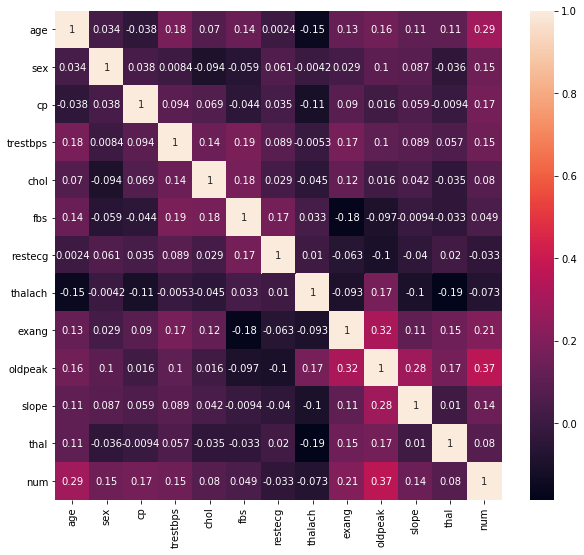

In [26]:
plt.figure(figsize=(10,9))
sns.heatmap(df.corr(),annot=True)

# Data Visualization

### Univariate Analysis

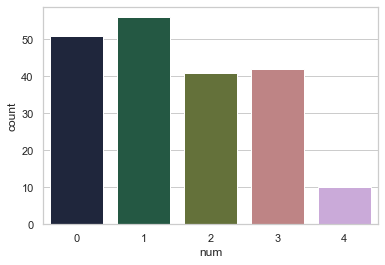

In [27]:
sns.set(style='whitegrid',palette='cubehelix')
sns.countplot(df['num'])
plt.show()

Around 50 people have no heartdisease, more than 50 have type 1 heartdisease

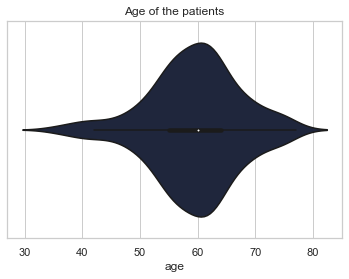

In [28]:
sns.violinplot(df['age'])
plt.title('Age of the patients')
plt.show()

Most of the patients are in the age range of 55-65

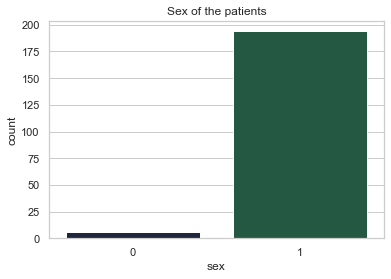

In [29]:
sns.countplot(df['sex'])
plt.title('Sex of the patients')
plt.show()

More than 180 patients are female

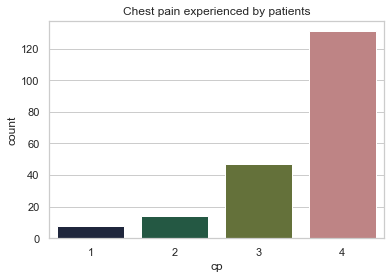

In [30]:
sns.countplot(df['cp'])
plt.title('Chest pain experienced by patients')
plt.show()

The chest pain experienced by most patients is asymptomatic

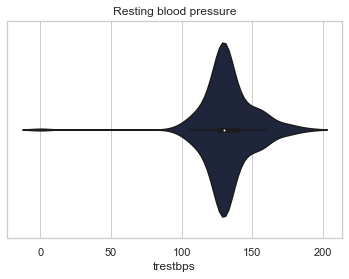

In [31]:
sns.violinplot(df['trestbps'])
plt.title('Resting blood pressure')
plt.show()

The resting blood pressure of most patients is in the range of 120-135 mm Hg

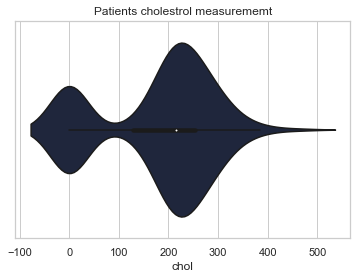

In [32]:
sns.violinplot(df['chol'])
plt.title('Patients cholestrol measurememt')
plt.show()

Most patients cholestrol is in the range of 200-225 mg/dl

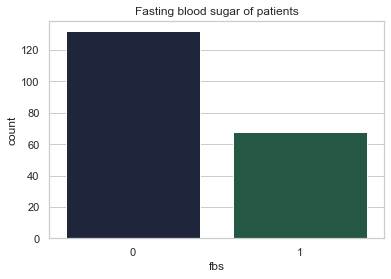

In [33]:
sns.countplot(df['fbs'])
plt.title('Fasting blood sugar of patients')
plt.show()

Around 130 patients have fasting blood sugar >120 mg/dl

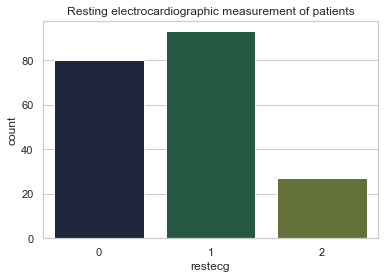

In [34]:
sns.countplot(df['restecg'])
plt.title('Resting electrocardiographic measurement of patients')
plt.show()

More than 90 patients resting electrocardiographic has ST-T wave abnormality

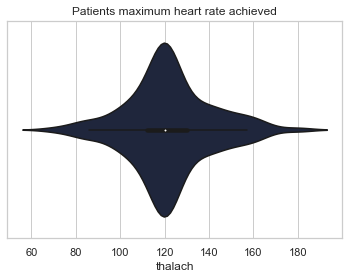

In [35]:
sns.violinplot(df['thalach'])
plt.title('Patients maximum heart rate achieved')
plt.show()

The maximum heart rate achieved by patients is in the range 115-125

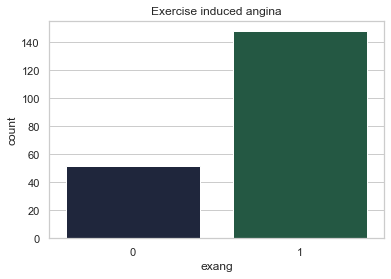

In [36]:
sns.countplot(df['exang'])
plt.title('Exercise induced angina')
plt.show()

Around 150 patients have exercise induced angina

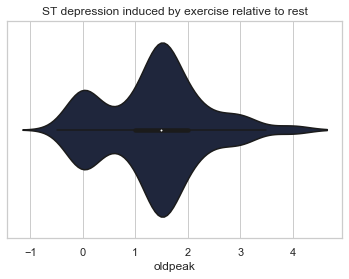

In [37]:
sns.violinplot(df['oldpeak'])
plt.title('ST depression induced by exercise relative to rest')
plt.show()

ST depression induced by exercise relative to rest for most patients is in the range 1.3-1.7

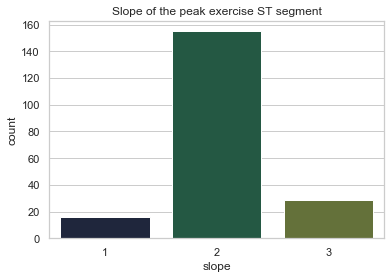

In [38]:
sns.countplot(df['slope'])
plt.title('Slope of the peak exercise ST segment')
plt.show()

The slope of the peak exercise ST segment for more than 150 patients is flat

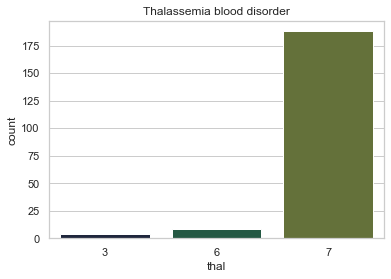

In [39]:
sns.countplot(df['thal'])
plt.title('Thalassemia blood disorder')
plt.show()

More than 180 patients have reversable thalassemia blood disorder

### Bivariate Analysis

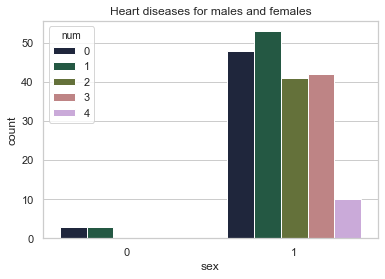

In [40]:
sns.countplot(x='sex',hue='num',data=df)
plt.title('Heart diseases for males and females')
plt.show()

Observations:
    1. Half of the male patients suffer from type 1 heart disease, the other have do not have any
    2. Around 48 of the female patients do not suffer from any heart disease
    2. More than 50 suffer from type 1 heart disease

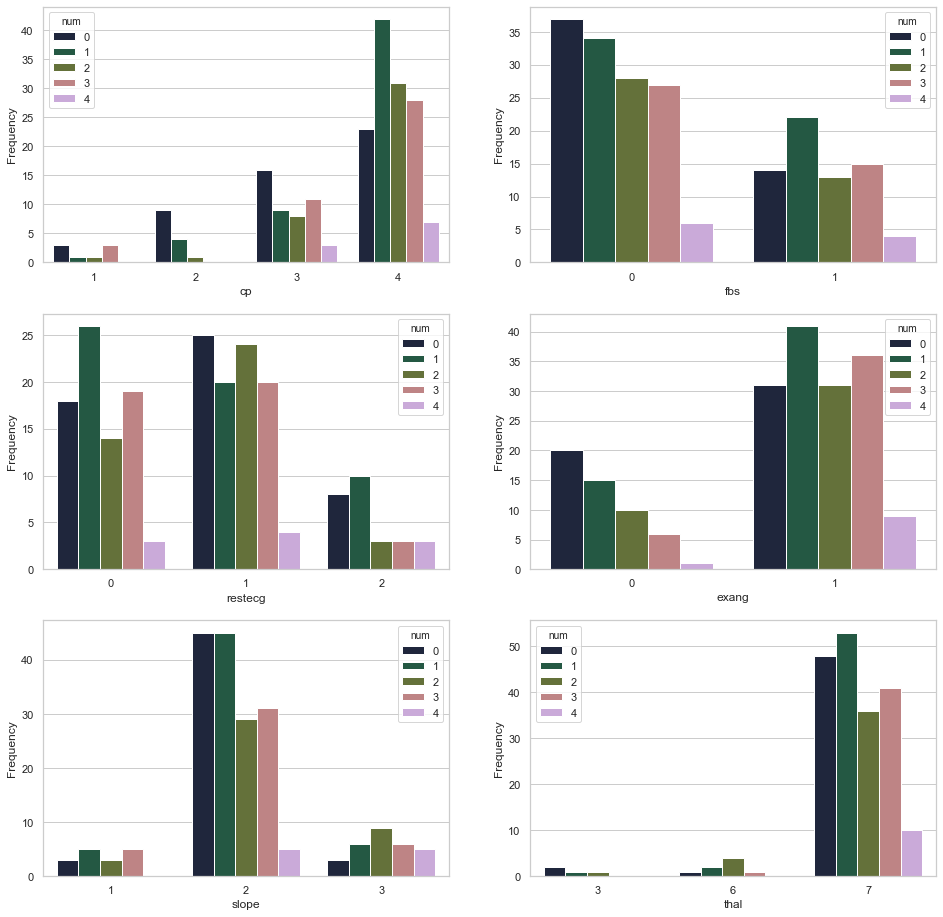

In [41]:
fig, axes = plt.subplots(3, 2, figsize=(16,16))
fs = ['cp', 'fbs','restecg','exang', 'slope','thal']
for i, axi in enumerate(axes.flat):
    sns.countplot(x=fs[i], hue='num', data=df, ax=axi) 
    axi.set(ylabel='Frequency')

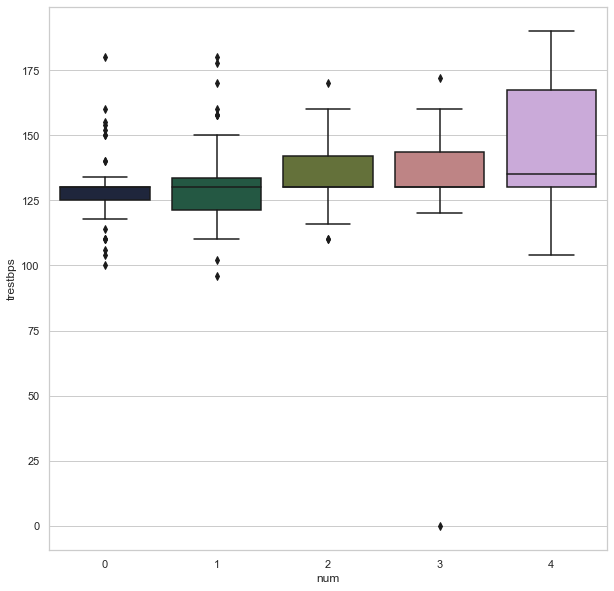

In [42]:
plt.figure(figsize=(10,10))
sns.boxplot(x="num", y="trestbps", data=df)

Most patients with resting blood pressure more than 150 suffer from type 4 heart disease

### Plotting Outliers

In [43]:
df.shape

(200, 13)

In [44]:
collist=df.columns.values
ncols=13
nrows=200

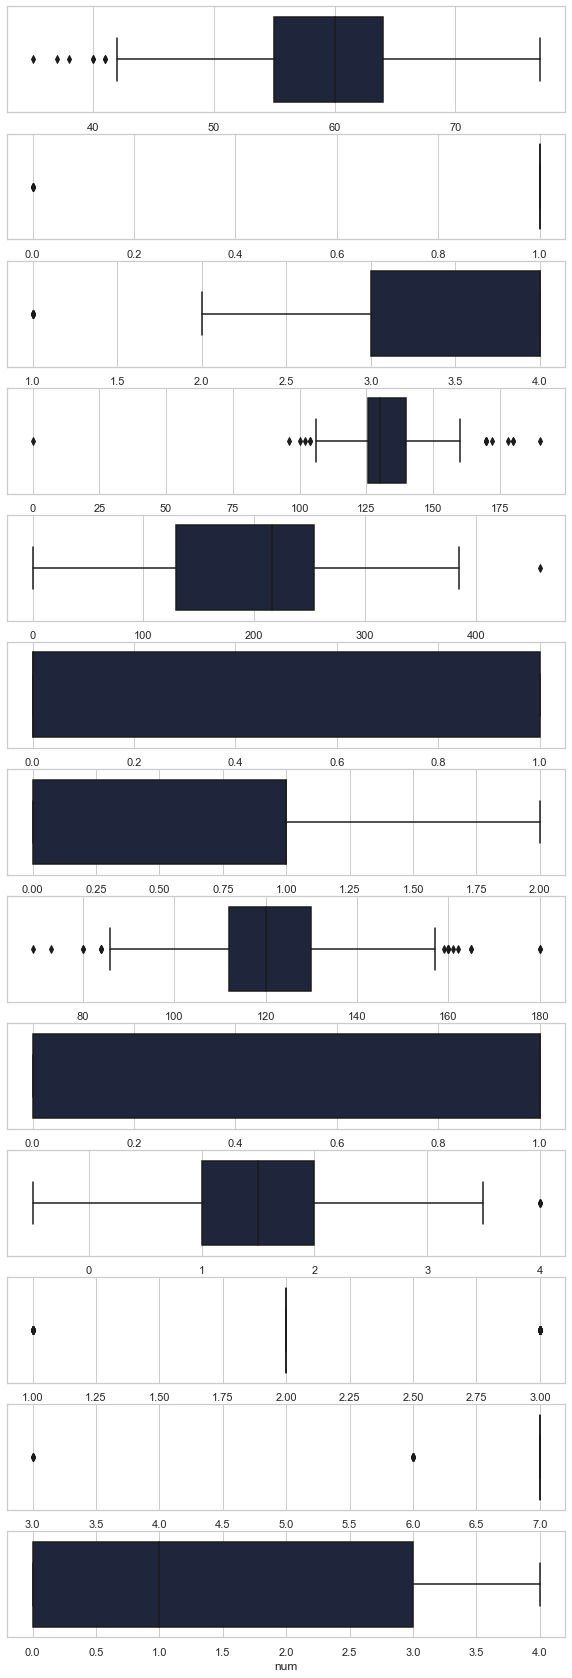

In [45]:
fig, axes = plt.subplots(13, figsize=(10,30))
for i, axi in enumerate(axes.flat):
    sns.boxplot(df[collist[i]], orient='h', ax=axi) 

The dataset has a few outliers

### Treating outliers

In [46]:
column_out = ['age', 'trestbps', 'chol', 'thalach']
for col in column_out:
    q1 = df[col].quantile(0.10)
    q2 = df[col].quantile(0.90)
    print('For ',col,': ',q1,'\t',q2)
    df[col]=np.where(df[col]<q1,q1,df[col])
    df[col]=np.where(df[col]>q2,q2,df[col])
    print(df[col].skew())
    print('\n\n')

For  age :  50.0 	 69.0
-0.022763438292119558



For  trestbps :  116.0 	 156.2
0.6228137294134848



For  chol :  0.0 	 292.5
-0.831725423814854



For  thalach :  100.0 	 149.1
0.3775942086722813





Now the EDA process is over

# Model Training

In [47]:
# seprating the input and output variables
x = df.drop(columns=['num'])
y = pd.DataFrame(df['num'])

In [48]:
# Scaling the input variable
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
columns = list(x)
for col in columns:
    x[col]=x[col].astype(float)
    x[[col]]=scaler.fit_transform(x[[col]])

In [49]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal
0,0.684211,1.0,1.000000,0.597015,0.888889,0.0,0.5,0.244399,1.0,0.777778,0.5,1.00
1,0.000000,1.0,1.000000,0.348259,0.714530,0.0,0.5,0.549898,0.0,0.111111,0.5,1.00
2,0.526316,1.0,1.000000,0.398010,0.745299,0.0,0.5,0.814664,1.0,0.444444,1.0,1.00
3,0.263158,1.0,1.000000,0.646766,0.779487,0.0,0.5,0.997963,1.0,0.666667,0.0,1.00
4,0.842105,1.0,0.666667,0.000000,0.728205,1.0,1.0,0.000000,1.0,0.400000,0.5,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.210526,0.0,1.000000,0.273632,1.000000,1.0,0.5,1.000000,0.0,0.111111,0.5,1.00
196,0.631579,1.0,0.000000,0.348259,0.475214,0.0,0.5,0.407332,1.0,0.444444,0.5,1.00
197,0.263158,1.0,1.000000,0.149254,0.762393,1.0,0.5,0.000000,0.0,0.111111,0.5,0.75
198,0.421053,1.0,1.000000,0.348259,1.000000,1.0,1.0,0.407332,1.0,0.444444,0.5,1.00


In [50]:
# Dividing input and target variables into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [51]:
print(x_train.shape,'\t',y_train.shape)

(160, 12) 	 (160, 1)


In [52]:
# Importing our model Library
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Importing GridSearchCV
from sklearn.model_selection import GridSearchCV

# Importing Evaluation metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [53]:
# Using algorithms via for loop
model=[GaussianNB(),DecisionTreeClassifier(),SVC(),KNeighborsClassifier()]
for m in model:
    m.fit(x_train,y_train)
    print('Score of ',m,' is: ',m.score(x_train,y_train))
    pred=m.predict(x_test)
    print('Accuracy score : ',accuracy_score(y_test,pred))
    print('Confusion matrix : \n',confusion_matrix(y_test,pred))
    print('Classification report : \n',classification_report(y_test,pred))
    print('*********************************************************************')
    print('\n\n')

Score of  GaussianNB(priors=None, var_smoothing=1e-09)  is:  0.11875
Accuracy score :  0.1
Confusion matrix : 
 [[0 1 1 3 3]
 [0 0 0 4 8]
 [0 0 1 2 6]
 [0 0 0 1 7]
 [0 0 0 1 2]]
Classification report : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.00      0.00      0.00        12
           2       0.50      0.11      0.18         9
           3       0.09      0.12      0.11         8
           4       0.08      0.67      0.14         3

    accuracy                           0.10        40
   macro avg       0.13      0.18      0.09        40
weighted avg       0.14      0.10      0.07        40

*********************************************************************



Score of  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=N

In [54]:
# Using KNeighborsClassifier 
knn_model = KNeighborsClassifier()
knn_model.fit(x_train,y_train)
print('Score : ',knn_model.score(x_train,y_train))
predknn = knn_model.predict(x_test)
print('Accuracy score : ',accuracy_score(y_test,predknn))
print('Confusion matrix : \n',confusion_matrix(y_test,predknn))
print('Classification report : \n',classification_report(y_test,predknn))

Score :  0.5625
Accuracy score :  0.4
Confusion matrix : 
 [[6 2 0 0 0]
 [6 5 1 0 0]
 [3 0 3 3 0]
 [2 4 0 2 0]
 [1 0 1 1 0]]
Classification report : 
               precision    recall  f1-score   support

           0       0.33      0.75      0.46         8
           1       0.45      0.42      0.43        12
           2       0.60      0.33      0.43         9
           3       0.33      0.25      0.29         8
           4       0.00      0.00      0.00         3

    accuracy                           0.40        40
   macro avg       0.34      0.35      0.32        40
weighted avg       0.40      0.40      0.38        40



In [55]:
# Cross validation 
from sklearn.model_selection import cross_val_score
score=cross_val_score(knn_model,x,y,cv=5,scoring='accuracy')
print('Mean score: ',score.mean())
print('Standard deviation : ',score.std())

Mean score:  0.375
Standard deviation :  0.04743416490252569


### Using Ensemble model

In [56]:
# Using RandomizedSearchCV for RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
rfc = RandomForestClassifier()
parameter={'n_estimators':[50,100,150,200,250],
          'min_samples_split':[2,4,6,8,10],
          'min_samples_leaf':[1,2,3,4],
          'max_depth':[5,10,15,20,25]}
grid_rfc = RandomizedSearchCV(estimator=rfc,
                           param_distributions=parameter,
                           n_iter = 100, 
                           cv = 5, verbose=2, 
                           n_jobs = -1,
                           random_state=42)
grid_rfc.fit(x,y)
grid_rfc.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   30.8s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.6min finished


{'n_estimators': 150,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_depth': 20}

In [57]:
# Using Random Forest with best parameters
rforest_model = RandomForestClassifier(n_estimators=150,min_samples_split=6,min_samples_leaf=1,max_depth=20)
rforest_model.fit(x_train,y_train)
print('Score : ',rforest_model.score(x_train,y_train))
predforest = rforest_model.predict(x_test)
print('Accuracy score : ',accuracy_score(y_test,predforest))
print('Confusion matrix : \n',confusion_matrix(y_test,predforest))
print('Classification report : \n',classification_report(y_test,predforest))

Score :  0.95625
Accuracy score :  0.275
Confusion matrix : 
 [[2 3 2 1 0]
 [4 4 2 2 0]
 [2 1 3 3 0]
 [4 2 0 2 0]
 [0 0 2 1 0]]
Classification report : 
               precision    recall  f1-score   support

           0       0.17      0.25      0.20         8
           1       0.40      0.33      0.36        12
           2       0.33      0.33      0.33         9
           3       0.22      0.25      0.24         8
           4       0.00      0.00      0.00         3

    accuracy                           0.28        40
   macro avg       0.22      0.23      0.23        40
weighted avg       0.27      0.28      0.27        40



In [58]:
# Using AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
svc = SVC()
abc = AdaBoostClassifier(base_estimator=svc,n_estimators=50,algorithm='SAMME')
abc.fit(x_train,y_train)
print('Score : ',abc.score(x_train,y_train))
predabc = abc.predict(x_test)
print('Accuracy score : ',accuracy_score(y_test,predabc))
print('Confusion matrix : \n',confusion_matrix(y_test,predabc))
print('Classification report : \n',classification_report(y_test,predabc))

Score :  0.275
Accuracy score :  0.3
Confusion matrix : 
 [[ 0  8  0  0  0]
 [ 0 12  0  0  0]
 [ 0  9  0  0  0]
 [ 0  8  0  0  0]
 [ 0  3  0  0  0]]
Classification report : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.30      1.00      0.46        12
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00         3

    accuracy                           0.30        40
   macro avg       0.06      0.20      0.09        40
weighted avg       0.09      0.30      0.14        40



KNeighborsClassifier gives the best accuracy for this dataset

In [59]:
# Saving the predictions in a csv file
predknn = pd.DataFrame(predknn)
predknn = predknn.rename(columns={0: 'num'})
predknn

,num
0,3
1,0
2,1
3,2
4,1
5,3
6,0
7,1
8,0
9,3


In [60]:
predknn.to_csv(r'Heartdiseases.csv',index=False)

In [61]:
# Saving KNeighborsClassifier
from sklearn.externals import joblib
joblib.dump(knn_model,'Heartdiseases.pkl')

['Heartdiseases.pkl']